##Problema de los 3 cuerpos simulacion

### Nicolas Bautista


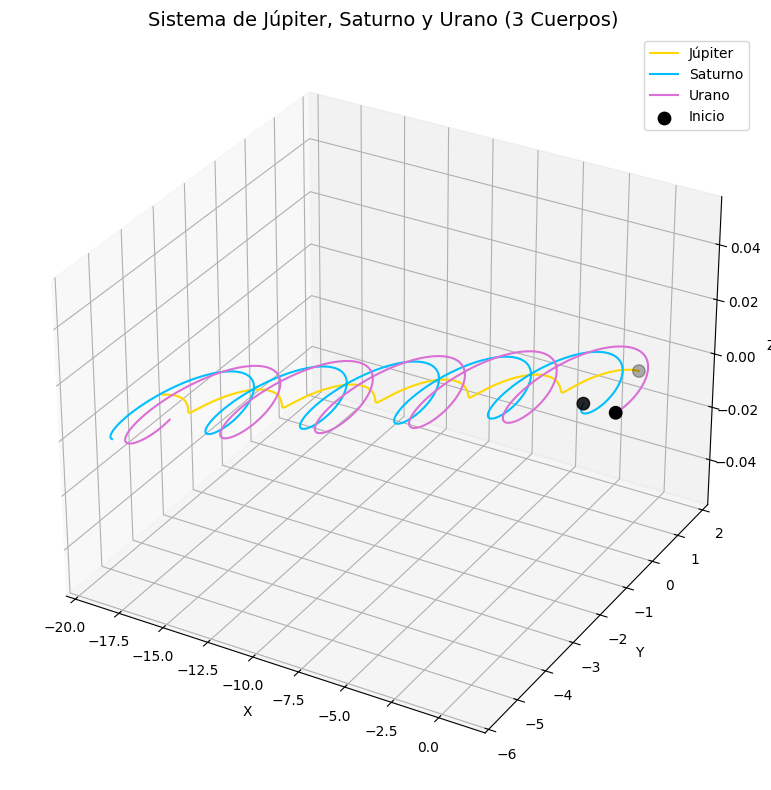

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

#Constante gravitacional normalizada
G = 1.0

#Masas relativas (Júpiter, Saturno, Urano)
m1 = 1.0
m2 = 5.683e26 / 1.898e27
m3 = 8.681e25 / 1.898e27

#Posiciones iniciales
r1 = np.array([0.0, 1.0, 0.0])
r2 = np.array([-np.sqrt(3)/2, -0.5, 0.0])
r3 = np.array([np.sqrt(3)/2, -0.5, 0.0])

#Velocidades iniciales ajustadas
v = 0.5
v1 = np.array([-v, 0.0, 0.0])
v2 = np.array([v/2, -v*np.sqrt(3)/2, 0.0])
v3 = np.array([v/2, v*np.sqrt(3)/2, 0.0])

#Estado inicial
y0 = np.concatenate([r1, r2, r3, v1, v2, v3])

#Derivadas del sistema (EDOs)
def deriv(t, y):

    r1 = y[0:3]
    r2 = y[3:6]
    r3 = y[6:9]

    v1 = y[9:12]
    v2 = y[12:15]
    v3 = y[15:18]

    def force(ra, rb, m):
        diff = rb - ra
        dist = np.linalg.norm(diff)
        return G * m * diff / dist**3

    a1 = force(r1, r2, m2) + force(r1, r3, m3)
    a2 = force(r2, r1, m1) + force(r2, r3, m3)
    a3 = force(r3, r1, m1) + force(r3, r2, m2)

    dydt = np.concatenate([v1, v2, v3, a1, a2, a3])
    return dydt

#Tiempo de simulación
t_span = (0, 60)
t_eval = np.linspace(*t_span, 2000)

#Resolver el sistema
sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)

#Extraer posiciones
r1_sol = sol.y[0:3]
r2_sol = sol.y[3:6]
r3_sol = sol.y[6:9]

#Graficar en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(r1_sol[0], r1_sol[1], r1_sol[2], label='Júpiter', color='gold')
ax.plot(r2_sol[0], r2_sol[1], r2_sol[2], label='Saturno', color='deepskyblue')
ax.plot(r3_sol[0], r3_sol[1], r3_sol[2], label='Urano', color='orchid')

ax.scatter([r1_sol[0][0], r2_sol[0][0], r3_sol[0][0]],
           [r1_sol[1][0], r2_sol[1][0], r3_sol[1][0]],
           [r1_sol[2][0], r2_sol[2][0], r3_sol[2][0]],
           color='black', s=80, label='Inicio')

ax.set_title('Sistema de Júpiter, Saturno y Urano (3 Cuerpos)', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


##Escala de tiempo mayor

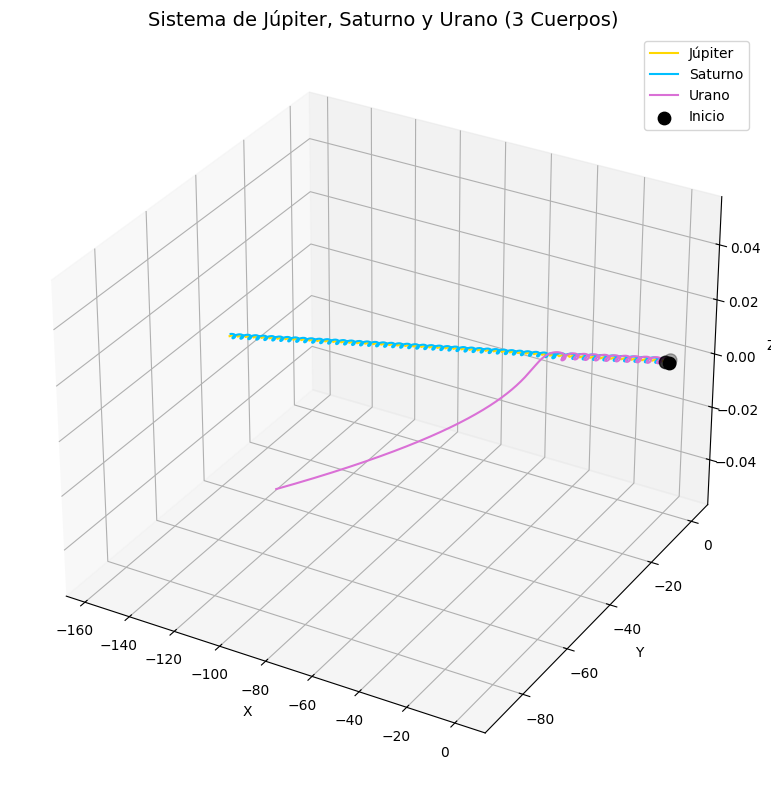

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

#Constante gravitacional normalizada
G = 1.0

#Masas relativas (Júpiter, Saturno, Urano)
m1 = 1.0
m2 = 5.683e26 / 1.898e27
m3 = 8.681e25 / 1.898e27

#Posiciones iniciales
r1 = np.array([0.0, 1.0, 0.0])
r2 = np.array([-np.sqrt(3)/2, -0.5, 0.0])
r3 = np.array([np.sqrt(3)/2, -0.5, 0.0])

#Velocidades iniciales ajustadas
v = 0.5
v1 = np.array([-v, 0.0, 0.0])
v2 = np.array([v/2, -v*np.sqrt(3)/2, 0.0])
v3 = np.array([v/2, v*np.sqrt(3)/2, 0.0])

#Estado inicial
y0 = np.concatenate([r1, r2, r3, v1, v2, v3])

#Derivadas del sistema (EDOs)
def deriv(t, y):

    r1 = y[0:3]
    r2 = y[3:6]
    r3 = y[6:9]

    v1 = y[9:12]
    v2 = y[12:15]
    v3 = y[15:18]

    def force(ra, rb, m):
        diff = rb - ra
        dist = np.linalg.norm(diff)
        return G * m * diff / dist**3

    a1 = force(r1, r2, m2) + force(r1, r3, m3)
    a2 = force(r2, r1, m1) + force(r2, r3, m3)
    a3 = force(r3, r1, m1) + force(r3, r2, m2)

    dydt = np.concatenate([v1, v2, v3, a1, a2, a3])
    return dydt

#Tiempo de simulación
t_span = (0, 500)
t_eval = np.linspace(*t_span, 2000)

#Resolver el sistema
sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)

#Extraer posiciones
r1_sol = sol.y[0:3]
r2_sol = sol.y[3:6]
r3_sol = sol.y[6:9]

#Graficar en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(r1_sol[0], r1_sol[1], r1_sol[2], label='Júpiter', color='gold')
ax.plot(r2_sol[0], r2_sol[1], r2_sol[2], label='Saturno', color='deepskyblue')
ax.plot(r3_sol[0], r3_sol[1], r3_sol[2], label='Urano', color='orchid')

ax.scatter([r1_sol[0][0], r2_sol[0][0], r3_sol[0][0]],
           [r1_sol[1][0], r2_sol[1][0], r3_sol[1][0]],
           [r1_sol[2][0], r2_sol[2][0], r3_sol[2][0]],
           color='black', s=80, label='Inicio')

ax.set_title('Sistema de Júpiter, Saturno y Urano (3 Cuerpos)', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()
